### Paquetes usados
- pandas
- re
- numpy
- matplotlib.pyplot

# PREPROCESAMIENTO DE DATOS
Abiendo el archivo *.csv*, vimos que el mismo usaba como separadores el punto y coma (;), en lugar de la coma tradicional (,). Por lo tanto, al leer el archivo (usando la función de pandas `pd.read_csv()`), se debe especificar el separador a utilizar. Para esto agregamos el parámetro `sep=';'` y así vemos que el dataframe se muestra correctamente.

In [35]:
import pandas as pd

# Leemos el archivo .csv con separadores ";" y lo guardamos en una variable
raw_df = pd.read_csv("winequality_BDS.csv", sep=';')

# Mostramos las primeras 5 filas del dataset
raw_df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates alcohol  quality  
0       0.42    11.8        6  
1       0.39    10.2        6  
2       0.53    12.7        6  
3       0.56     9.4        5  
4       0.38    10.2        5

## Informacion de las variables
`raw_df.info()`

### Sobre el conjunto de datos
Este conjunto de datos contiene 3231 muestras de vino obtenidas mediante pruebas fisicoquímicas en la bodega Del Sol, elaboradas a partir de dos tipos de uva.
### Descripción de las variables
- `type`: tipo de uva con la que se elabora el vino.
- `fixed acidity`: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
- `volatile acidity`: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro.
- `citric acid`: contenido de ácido cítrico en el vino, medido en gramos por litro.
- `residual sugar`: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro.
- `chlorides`: concentración de cloruros (sales) en el vino, medida en gramos por litro.
- `free sulfur dioxide`: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro.
- `total sulfur dioxide` : suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
- `density`: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
- `pH`: medida de la acidez o alcalinidad del vino.
- `sulphates`: concentración de sales de sulfato en el vino, medida en gramos por litro.
- `alcohol`: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
- `quality`: puntuación del vino, con una escala que va de 0 a 10.

In [36]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


## Pulir datos

Para comenzar a trabajar sobre los datos, antes que nada hacemos una copia del dataframe en crudo. El dataframe sobre el que haremos modificaciones se llamará `df`.

In [37]:
# Creamos un nuevo dataframe para trabajar en él.
df = raw_df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


### Columna *'type'*
Esta variable nos muestra la variedad del vino en cuestion. Es una variable cuantitativa nominal y tiene dos varoles posibles: **"Moscatel"** o **"Syrah"**. No tiene valores nulos.

In [38]:
df['type'].value_counts()

type
Moscatel    1632
Syrah       1599
Name: count, dtype: int64

### Columna *'fixed acidity'*
Esta columna refleja la cantidad de acidos no volatiles presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.

- `acido no volatil`: aquellos acidos que no se evaporan facilmente y permanecen en el vino durante su almacenamiento y consumo. Contribuyen al sabor (equilibro entre dulzura y acidez), estructura-longevidad (envejecimiento y preservacion) y a definir textura-frescura 

In [39]:
print(df['fixed acidity'].describe())

count    3231.000000
mean        7.414082
std         1.598760
min         3.800000
25%         6.400000
50%         7.000000
75%         8.000000
max        15.900000
Name: fixed acidity, dtype: float64


### Columna *'volatile acidity'*
Esta columna da la cantidad de acidos volatiles presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.

- `acido volatil`: (AV) es el conjunto de ácidos grasos de la serie
acética que se hallan en el vino libres o combinados formando sales.
El más importante es el ácido acético.
El olor desagradable a "picado" de algunos vinos es debido principalmente al ácido acético y al acetato de etilo. El nivel sensorial
de estos compuestos es del orden de 0,6 g/L para el ácido acético
y 0,1 g/L para el acetato de etilo. 

*Para mas informacion, visitar:*
- *[Enología - U. de Santiago de Compostela](https://www.usc.gal/caa/MetAnalisisStgo1/enologia.pdf)*
- *[Acidos y acidez en el vino - Aprender de vino](https://www.aprenderdevino.es/acidos-acidez-vino/)*

In [40]:
print(df['volatile acidity'].describe())

count    3231.000000
mean        0.403802
std         0.189421
min         0.085000
25%         0.260000
50%         0.360000
75%         0.530000
max         1.580000
Name: volatile acidity, dtype: float64


### Columna *'citric acid'*
Esta columna muestra la cantidad de acido citrico presente en el vino, medida en gramos por litro. Es una variable cuantitativa continua.
- `acido citrico`: Esta escasamente presente en la uva. Se utiliza tambien como acidificante. En cuanto a su dosis no debe superar la cantidad de 1 g/L (limite juridico europeo) y puede presentarse de 20 a 60 g/L. 

> *Para mas información, visitar:*
>    - *[Acido citrico](https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)*

In [41]:
print(df['citric acid'].describe())

count    3231.000000
mean        0.288028
std         0.156842
min         0.000000
25%         0.200000
50%         0.280000
75%         0.370000
max         1.000000
Name: citric acid, dtype: float64


### Columna 'residual sugar'
Esta columna da la cantidad de azúcar residual en gramos por litro de vino. Es una variable cuantitativa continua.
- `azucar residual`: La uva contiene, al ser vendimiada (proceso de recolección de la uva cuando está madura para hacer vino), unos 200 gramos de azucares por litro de mosto (El mosto es el jugo fresco de la uva que se obtiene después de su prensado y antes de que comience el proceso de fermentación alcohólica. Al fermentar, el azúcar desaparece en gran parte, quedando lo que los enólogos llaman azucares residuales.
> *Para mas información, visitar:*
>    - *[¿ Sabes lo que es el azucar residual ?](https://www.catadelvino.com/blog-cata-vino/sabes-lo-que-es-el-azucar-residual-de-un-vino)*

In [42]:
print(df['residual sugar'].describe())

count    3231.000000
mean        4.526339
std         4.143991
min         0.700000
25%         1.900000
50%         2.500000
75%         6.100000
max        26.050000
Name: residual sugar, dtype: float64


### Columna *'chlorides'*
- `cloruros`: medidos en miligramos por litro (mg/L). Es una variable cuantitativa continua.
Los cloruros (*"chlorides" por su nombre en ingles*) en el vino pueden afectar el sabor y la calidad del mismo, y también pueden ayudar a determinar su origen y las variedades de uva:

- **Sabor:**
      altas concentraciones de cloruro pueden darle al vino un sabor salado indeseable, lo que puede reducir su atractivo en el mercado. Sin embargo, también se cree que la presencia de cloruro es necesaria para que el sabor salado sea percibido.

- **Origen:**
      La concentración de cloruro en el vino puede verse influenciada por las condiciones geográficas, geológicas y climáticas del viñedo, como su distancia de la costa, el tipo de suelo y si se riega con agua salada.

- **Variedades de uva:**
      El tipo de uva utilizado en el vino puede influir en la cantidad de cloruro que contiene.

- **Restricciones legales:**
      La concentración de cloruro en el vino está regulada por diferentes países. Por ejemplo, el nivel máximo legal de cloruro en el vino terminado es de 606 mg/L.

La concentración de cloruro en el vino varía ampliamente, pero raramente supera los 500 mg/L.

In [43]:
df['chlorides'].describe()

count    3231.000000
mean        0.066149
std         0.041908
min         0.009000
25%         0.042000
50%         0.058000
75%         0.080000
max         0.611000
Name: chlorides, dtype: float64

### Columna *'free sulfur dioxide'*
Esta columna nos indica la cantidad de dióxido de azufre (SO<sub>2</sub>) libre presente en el vino, medido en miligramos por litro (mg/L). Es una variable cuantitativa continua.
- `dioxido de azufre`: Se obtiene por oxidación del azufre donde por una combustión del azufre con el oxígeno genera el dióxido de azufre.
Es considerado como el primer aditivo de uso enológico, el cual desde los comienzos del tiempo de la enología fue muy útil ya que a partir de su uso, se determinaron menos alteraciones durante las etapas de conservación. Esto se explica gracias a la fuerte acción bactericida que tiene, actualmente se lo sigue considerando como algo indispensable en la enología de nuestros días.
En el vino, lo vamos a tener bajo tres formas:
    - anhídrido sulfuro libre
    - anhídrido sulfuroso combinado
    - anhídrido sulfuroso total (que es la suma de los dos anteriores).

El anhídrido sulfuroso libre tiene distintas formas, una de ellas es la forma gaseosa, como dióxido de azufre que es soluble en el agua del vino; el ácido sulfuroso; el anión sulfito ácido que proviene de la disociación del ácido sulfuroso; y también en anión sulfito. 

> *Para mas información, visitar:*
>    - *[El Consejo de Enólogos](http://www.consejodeenologos.com.ar/panel/upload/contenidos/pdf/Microsoft_Word___ANHDRIDO_SULFUROSO_1.pdf)*
>    - *[Vinetur](https://www.vinetur.com/2016011026759/las-propiedades-del-anhidrido-sulfuroso-en-la-elaboracion-del-vino.html)*

In [44]:
df['free sulfur dioxide'].describe()

count    3231.000000
mean       25.649335
std        17.422288
min         1.000000
25%        12.000000
50%        23.000000
75%        35.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64

### Columna *'total sulfur dioxide'*
Esta columna nos indica la cantidad total de dióxido de azufre (SO<sub>2</sub>) total presente en el vino, medido en miligramos por litro (mg/L). Es una variable cuantitativa continua.

- `dioxido de azufre total`: está constituido por la suma del anhídrido sulfuroso libre
y el anhídrido sulfuroso combinado.

> *Para mas información, visitar:*
>    - *[El Consejo de Enólogos](http://www.consejodeenologos.com.ar/panel/upload/contenidos/pdf/Microsoft_Word___ANHDRIDO_SULFUROSO_1.pdf)*
>    - *[Vinetur](https://www.vinetur.com/2016011026759/las-propiedades-del-anhidrido-sulfuroso-en-la-elaboracion-del-vino.html)*

In [45]:
df['total sulfur dioxide'].describe()

count    3231.000000
mean       88.349892
std        54.633913
min         6.000000
25%        38.000000
50%        89.000000
75%       127.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64

### Columna *'density'*
En esta columna podemos ver la densidad del vino, medida en gramos por centímetro cúbico (g/cm<sup>3</sup>). Es una variable cuantitativa continua.

- `densidad`: La densidad o peso específico del vino es un parámetro analítico de importancia relativa. Si estrujamos uvas y medimos la densidad de ese mosto comprobamos que pesa más que el agua. Un litro de agua pesa 1.000 gramos y un litro de mosto pesa 994 gramos, pero no siempre es lo mismo. Durante la fermentación, que dura unos diez días, la densidad que parte de 1.100, concluye en 994. La diferencia es el tufo que va a la atmósfera.
Pero no todos los vinos acaban su fermentación con la misma densidad, depende de su contenido en alcohol. Si la uva es muy madura tendrá mucho azúcar que formara 14º de alcohol y ese vino tendrá densidad 0,993 que significa que un litro pesará 993 gramos. Por el contrario, si vendimiamos esa uva sin madurar su grado de alcohol será 10º y su densidad de 0,996, lo cual significa que un litro pesa 996 gramos.

*Para mas información, visitar [Densidad del vino - La Rioja](https://www.larioja.com/opinion/densidad-vino-20210611214244-nt.html?ref=https%3A%2F%2Fwww.larioja.com%2Fopinion%2Fdensidad-vino-20210611214244-nt.html).*

In [46]:
df['density'].describe()

count    3231.000000
mean        1.901500
std         8.747779
min         0.987110
25%         0.992550
50%         0.995500
75%         0.997230
max       100.369000
Name: density, dtype: float64

### Columna *'pH'*
Esta columna nos indica el pH del vino. Es una variable cuantitativa continua.

- `pH`: Podemos decir que el pH mide el grado de acidez o de alcalinidad de una disolución obtenida de cualquier elemento o sustancia. Esta unidad de medida se distribuye a lo largo de una escala que va desde el 0 hasta el 14, tomándose el 7 como neutro, siendo los valores más cercanos a 0 los que indican que esa disolución es más ácida y los valores más cercanos a 14 los que indican que esa solución es más alcalina o básica, como también se denomina.
El pH de la mayoría de los vinos se encuentra en el intervalo de 2,8 a 4, lo que lógicamente recae en el lado ácido de la escala. Un vino con un pH de 2,8 es extremadamente ácido mientras que uno con un pH en torno a 4 es plano, carente de acidez.

> *Para mas información, visitar [pH - Aprender de vino](https://www.aprenderdevino.es/ph-y-vino/).*

In [47]:
df['pH'].describe()

count    3231.000000
mean        3.235908
std         0.164921
min         2.740000
25%         3.120000
50%         3.230000
75%         3.340000
max         4.010000
Name: pH, dtype: float64

### Columna *'sulphates'*
Esta columna nos indica la cantidad de sales de sulfato presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.
- `sales de sulfato`: sulfatos en vinos son variados y dependen del suelo, del metabolismo de la planta, de su capacidad de absorción y de las prácticas enológicas llevadas a cabo en bodega. 
Segun la fuente citada, las medidas son:
    1. Vinos secos: UN GRAMO POR LITRO (1,00 g/l)
    2. Vinos edulcorados: UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    3. Vinos que posean un contenido de azúcares reductores remanentes naturales de fermentación superior a CUATRO GRAMOS POR LITRO (4 g/l): UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    4. Con añejamiento mínimo de DOS (2) años en barrica: UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    5. Vinos provenientes de procedimientos especiales de elaboración con denuncia previa ante este Instituto para los controles oficiales pertinentes: DOS GRAMOS POR LITRO (2,00 g/l).

*Para mas informacion, visitar [Vinos - Limites Maximos de contenido de cloruros y sulfatos](http://www.allinsa.com/?p=608).).*

In [48]:
df['sulphates'].describe()

count    3231.000000
mean        0.573680
std         0.166353
min         0.230000
25%         0.470000
50%         0.550000
75%         0.650000
max         2.000000
Name: sulphates, dtype: float64

### Columna *'alcohol'*

Podemos ver que la columna 'alcohol' a simple vista consta de números reales, sin embargo, está establecida como tipo object, entonces procedemos a modificar su formato a tipo float, para así poder analizar esta variable de una manera adecuada.

Antes de hacer la transformación, comprobamos que sea de tipo object y analizamos qué objects tenemos dentro de esta columna. Podemos confirmar que son todos de tipo STR (string). A fin de observar más en detalle los datos de esta columna vemos los valores que son únicos y que se pueden repetir. Ante esto podemos ver que hay muchos valores que no tienen sentido para la muestra ya que el alcohol está definido como: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).

Para corregir los valores analizamos dos caminos, uno que el valor definido en string tenga sentido por lo que lo convertiremos en float y por el otro lado que este no tenga manera de ser convertido a float y tampoco tenga sentido en nuestra muestra. Para ello definimos una función que lo que pueda ser convertible a float lo haga y lo que no lo transforme en nan. Invocamos la función con cada valor de la columna alcohol y luego eliminamos las filas con nans. Y verificamos que nuestra muestra ahora tenga sentido y no hayamos perdido muchas filas.

Finalmente, pasamos los valores a tipo numérico con el método to_numeric() de pandas.

In [49]:
import re
import pandas as pd

print(df['alcohol'].dtype) # Vemos que tipo de dato es alcohol

# Contar y ver los tipos de objetos en la columna 'alcohol'
tipos_alcohol = df['alcohol'].apply(type).value_counts()
print(tipos_alcohol)

# Ver todos los valores de la columna 'alcohol'
print(df['alcohol'].unique())


object
alcohol
<class 'str'>    3231
Name: count, dtype: int64
['11.8' '10.2' '12.7' '9.4' '12' '11.3' '10.9' '9.8' '12.2' '11.1' '11.4'
 '12.8' '10.1' '12.9' '9.2' '12.3' '13.5' '11' '10.6' '12.4' '9.1' '11.2'
 '10.4' '12.5' '11.6' '12.6' '11.5' '10.5' '12.1' '9.9' '9.5' '10.8'
 '10.7' '13.2' '10.3' '8.8' '8.5' '13.1' '13' '10' '13.9' '9.6' '13.4'
 '11.7' '13.6' '13.3' '13.7' '9.7' '9' '11.9' '9.3' '8.7' '8.6' '8.4'
 '8.9' '14' '14.2' '11.94' '128.933.333.333.333' '114.666.666.666.667'
 '10.98' '100.333.333.333.333' '114.333.333.333.333' '105.333.333.333.333'
 '953.333.333.333.333' '109.333.333.333.333' '113.666.666.666.667'
 '113.333.333.333.333' '110.666.666.666.667' '973.333.333.333.333' '11.05'
 '9.75' '11.35' '9.55' '10.55' '11.45' '14.05' '123.333.333.333.333'
 '12.75' '13.8' '12.15' '13.05' '112.666.666.666.667'
 '105.666.666.666.667' '117.333.333.333.333' '11.75' '10.65'
 '109.666.666.666.667' '101.333.333.333.333' '10.15' '104.666.666.666.667'
 '116.333.333.333.333' '12.25' '

In [50]:
import re
import pandas as pd

# Función para limpiar y convertir a float
def limpiar_y_convertir(valor):
    try:
        # Reemplazar comas por puntos
        valor = re.sub(r',', '.', valor)
        # Convertir a float
        return float(valor)
    except ValueError:
        # Si no se puede convertir, devolver NaN
        return float('nan')

# Aplicar la función a la columna 'alcohol'
df['alcohol'] = df['alcohol'].apply(limpiar_y_convertir)

# Eliminar filas con valores NaN en la columna 'alcohol'
df = df.dropna(subset=['alcohol'])

print(df['alcohol'].dtype) # Vemos que tipo de dato es alcohol

# Contar y ver los tipos de objetos en la columna 'alcohol'
tipos_alcohol = df['alcohol'].apply(type).value_counts()
print(tipos_alcohol)

# Ver todos los valores de la columna 'alcohol'
print(df['alcohol'].unique())


float64
alcohol
<class 'float'>    3191
Name: count, dtype: int64
[11.8  10.2  12.7   9.4  12.   11.3  10.9   9.8  12.2  11.1  11.4  12.8
 10.1  12.9   9.2  12.3  13.5  11.   10.6  12.4   9.1  11.2  10.4  12.5
 11.6  12.6  11.5  10.5  12.1   9.9   9.5  10.8  10.7  13.2  10.3   8.8
  8.5  13.1  13.   10.   13.9   9.6  13.4  11.7  13.6  13.3  13.7   9.7
  9.   11.9   9.3   8.7   8.6   8.4   8.9  14.   14.2  11.94 10.98 11.05
  9.75 11.35  9.55 10.55 11.45 14.05 12.75 13.8  12.15 13.05 11.75 10.65
 10.15 12.25 11.85 11.65 13.55 11.95 11.55 12.05 14.9   9.95  9.25  9.05
 10.75]


- `alcohol`: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).Este rasgo de los vinos está regulado por una normativa específica que establece ciertos limites al respecto, concretamente a cargo de la Organización Internacional del Vino (OIV) y del comité regulador de cada Denominación de Origen (DO). No obstante, y de una forma generalizada, los vinos no suelen exceder los 15% vol. o 15 grados de alcohol, debido a que es lo máximo que alcanzan durante la fermentación.

*Para mas informacion, visitar [¿ Que es la graduacion alcoholica del vino ? ](https://www.debuenavid.es/blog/elaboracion-del-vino/graduacion-alcoholica-vino#%C2%BFQue_es_la_graduacion_alcoholica_del_vino).).*


In [51]:
#Ahora si hagamos un describe de la columna alcohol.

df['alcohol'].describe()

count    3191.000000
mean       10.630809
std         1.212548
min         8.400000
25%         9.500000
50%        10.500000
75%        11.400000
max        14.900000
Name: alcohol, dtype: float64

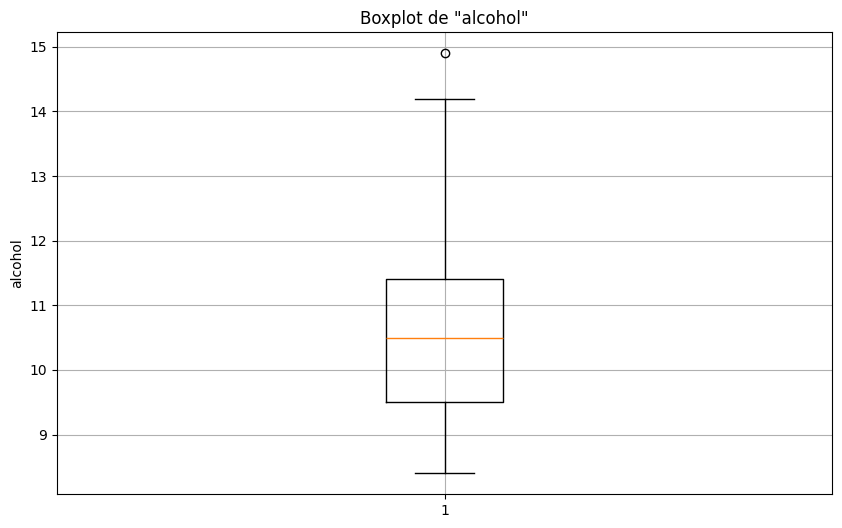

In [52]:
import matplotlib.pyplot as plt
import numpy as np

#Boxplot de la columna 'alcohol'
plt.figure(figsize=(10, 6))
plt.boxplot(df['alcohol'])
plt.title('Boxplot de "alcohol"')
plt.ylabel('alcohol')

# Añadir la grilla
plt.grid(True)

# Mostrar el gráfico
plt.show()


### Columna *'quality'*
Esta columna nos indica la calidad del vino, con una escala que va de 0 a 10. Es una variable cuantitativa discreta.

In [53]:
df['quality'].describe()

count    3191.000000
mean        5.782827
std         0.830549
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

## Descripcion de las variables numericas
`describe()` del dataframe.

In [55]:
df_agrupado_type = df.groupby('type')

df_agrupado_type.get_group('Moscatel').describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1598.000000       1598.000000  1598.000000     1598.000000   
mean        6.533292          0.282193     0.304731        6.496558   
std         0.705888          0.099157     0.104933        4.960438   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.100000          0.220000     0.250000        1.900000   
50%         6.500000          0.270000     0.290000        5.400000   
75%         6.900000          0.330000     0.340000        9.900000   
max         9.400000          1.100000     1.000000       26.050000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1598.000000          1598.000000           1598.000000  1598.000000   
mean      0.045308            35.150188            129.273780     1.613447   
std       0.020784            17.621924             38.077636     7.818225   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            103.000000     0.990923   
50%       0.043000            33.000000            124.000000     0.992785   
75%       0.050000            45.000000            154.000000     0.995440   
max       0.271000           289.000000            440.000000   100.295000   

                pH    sulphates      alcohol      quality  
count  1598.000000  1598.000000  1598.000000  1598.000000  
mean      3.161633     0.490232    10.838586     5.931164  
std       0.139785     0.112730     1.312233     0.826316  
min       2.790000     0.230000     8.400000     3.000000  
25%       3.070000     0.410000     9.600000     5.000000  
50%       3.160000     0.480000    10.800000     6.000000  
75%       3.247500     0.550000    11.837500     6.000000  
max       3.760000     1.080000    14.200000     8.000000

In [56]:
df_agrupado_type.get_group('Syrah').describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1593.000000       1593.000000  1593.000000     1593.000000   
mean        8.319523          0.527476     0.271161        2.538010   
std         1.738144          0.179059     0.194954        1.409835   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1593.000000          1593.000000           1593.000000  1593.000000   
mean      0.087501            15.875706             46.391714     2.213269   
std       0.047140            10.466847             32.885012     9.681967   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997840   
max       0.611000            72.000000            289.000000   100.369000   

                pH    sulphates      alcohol      quality  
count  1593.000000  1593.000000  1593.000000  1593.000000  
mean      3.311224     0.658054    10.422379     5.634024  
std       0.154190     0.169692     1.063917     0.808107  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000